In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

calendar = pd.read_csv('./calendar.csv')
reviews  = pd.read_csv('./reviews.csv', engine='python',error_bad_lines=False)
listings = pd.read_csv('./listings.csv')




Skipping line 82716: unexpected end of data


In [2]:
calendar.head();


In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
calendar.describe()

,listing_id
count,"1,393,570.00"
mean,"5,550,111.42"
std,"2,962,273.53"
min,"3,335.00"
25%,"3,258,213.00"
50%,"6,118,244.50"
75%,"8,035,212.00"
max,"10,340,165.00"


In [5]:
#Data Cleaning

listings['price'] = pd.to_numeric(listings['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

In [6]:
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.00,f,nan,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.00,f,nan,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.00,f,nan,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,nan,f,nan,WASHINGTON,f,flexible,f,f,1,nan
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.00,f,nan,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
listings.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,"3,818.00","3,818.00","3,818.00","3,816.00","3,816.00","3,818.00","3,818.00","3,818.00","3,802.00","3,812.00",...,"3,171.00","3,160.00","3,165.00","3,160.00","3,167.00","3,163.00","3,162.00",0.00,"3,818.00","3,191.00"
mean,"5,550,111.42","20,160,104,002,432.00","15,785,555.11",7.16,7.16,47.63,-122.33,3.35,1.26,1.31,...,94.54,9.64,9.56,9.79,9.81,9.61,9.45,nan,2.95,2.08
std,"2,962,660.48",0.00,"14,583,815.27",28.63,28.63,0.04,0.03,1.98,0.59,0.88,...,6.61,0.70,0.80,0.60,0.57,0.63,0.75,nan,5.89,1.82
min,"3,335.00","20,160,104,002,432.00","4,193.00",1.00,1.00,47.51,-122.42,1.00,0.00,0.00,...,20.00,2.00,3.00,2.00,2.00,4.00,2.00,nan,1.00,0.02
25%,"3,258,256.25","20,160,104,002,432.00","3,275,204.00",1.00,1.00,47.61,-122.35,2.00,1.00,1.00,...,93.00,9.00,9.00,10.00,10.00,9.00,9.00,nan,1.00,0.69
50%,"6,118,244.50","20,160,104,002,432.00","10,558,142.00",1.00,1.00,47.62,-122.33,3.00,1.00,1.00,...,96.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,1.00,1.54
75%,"8,035,126.75","20,160,104,002,432.00","25,903,093.25",3.00,3.00,47.66,-122.31,4.00,1.00,2.00,...,99.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,2.00,3.00
max,"10,340,165.00","20,160,104,002,432.00","53,208,610.00",502.00,502.00,47.73,-122.24,16.00,8.00,7.00,...,100.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,37.00,12.15


In [8]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
reviews.describe(include='all')


,listing_id,id,date,reviewer_id,reviewer_name,comments
count,"82,714.00","82,714.00",82714,"82,714.00",82714,82696
unique,nan,nan,1928,nan,14160,82015
top,nan,nan,2015-09-21,nan,David,The host canceled this reservation the day bef...
freq,nan,nan,567,nan,852,56
mean,"3,013,681.26","30,646,517.11",NaN,"17,039,254.67",NaN,NaN
std,"2,473,623.33","16,356,247.14",NaN,"13,541,317.55",NaN,NaN
min,"4,291.00","3,721.00",NaN,15.00,NaN,NaN
25%,"808,811.00","17,304,426.00",NaN,"5,067,215.75",NaN,NaN
50%,"2,489,283.00","32,366,108.00",NaN,"14,170,629.00",NaN,NaN
75%,"4,710,866.00","44,634,585.00",NaN,"27,668,445.75",NaN,NaN


In [10]:
# What is the most common property type in seatle
# What is the neighborhood with the highest number properties
# Price Analysis of most common property in most common neighborhood

In [11]:
default_list = listings[['property_type', 'neighbourhood', 'review_scores_value', 
                        'bathrooms', 'bedrooms', 'price', 'longitude', 'latitude']]

new_listings = default_list.dropna(axis = 0, how = 'any')
#new_list = default_list

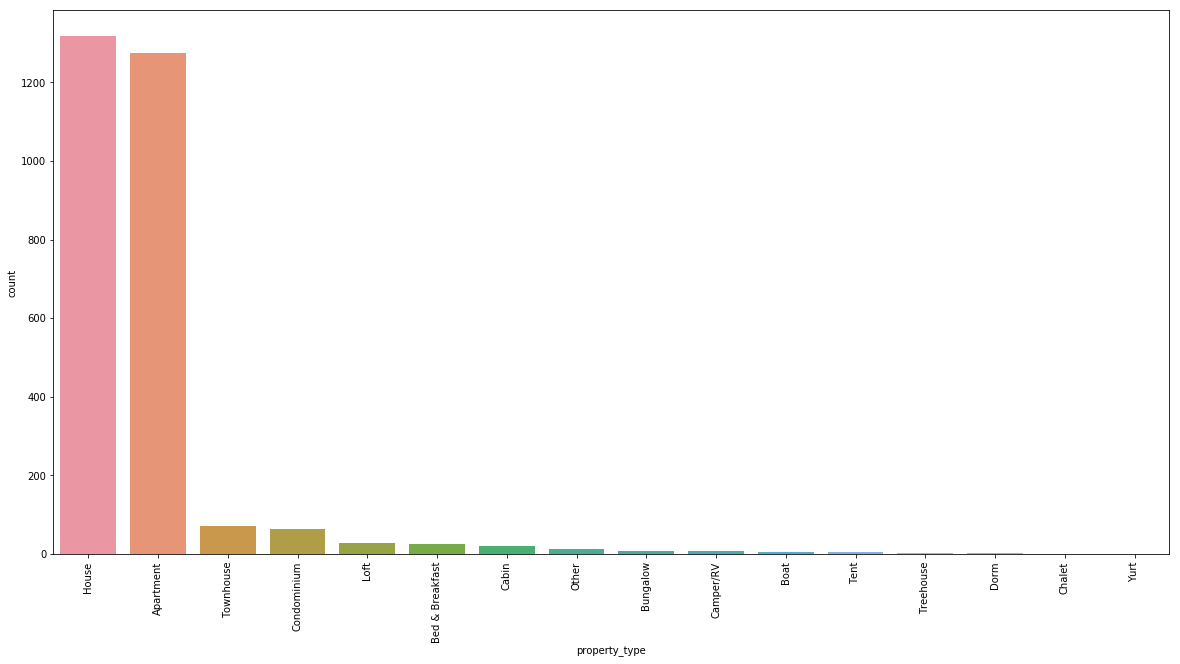

In [12]:

g =  sns.countplot((new_listings)[('property_type')],order = new_listings['property_type'].value_counts().index)


loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
g.legend(loc=1)
g.figure.set_size_inches(20,10)
#sns.set(font_scale = 2.5)

#g.set_title("Property types")

In [13]:
(new_listings['property_type'] =='House').value_counts()


False    1523
True     1317
Name: property_type, dtype: int64

In [14]:
(new_listings['property_type'] =='Apartment').value_counts()


False    1566
True     1274
Name: property_type, dtype: int64

In [15]:
(new_listings['property_type'] =='Yurt').value_counts()


False    2839
True        1
Name: property_type, dtype: int64

In [16]:
new_listings['property_type'].value_counts()

House              1317
Apartment          1274
Townhouse            71
Condominium          63
Loft                 28
Bed & Breakfast      25
Cabin                20
Other                12
Bungalow              8
Camper/RV             8
Boat                  4
Tent                  4
Treehouse             2
Dorm                  2
Chalet                1
Yurt                  1
Name: property_type, dtype: int64

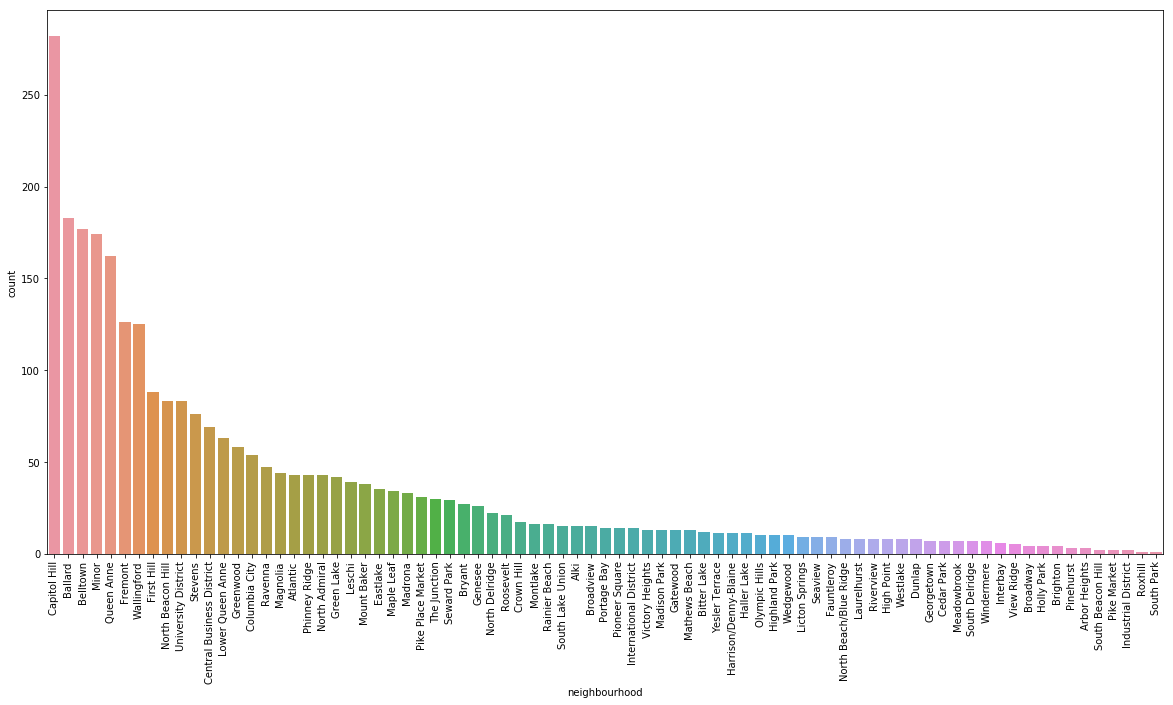

In [17]:
g =  sns.countplot((new_listings)[('neighbourhood')],order = new_listings['neighbourhood'].value_counts().index)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
g.legend(loc=1)
g.figure.set_size_inches(20,10)
#sns.set(font_scale = 3.5)

#g.set_title("Neighbourhoods")

In [18]:
#new_list['neighbourhood'].value_counts()
#new_list['neighbourhood'].shape[0]
(new_listings['neighbourhood'] =='Capitol Hill').value_counts()


False    2558
True      282
Name: neighbourhood, dtype: int64

In [19]:
#filter with House as property type
property_type_filter = ['House']
true_false_by_property_type_filter = new_listings.property_type.isin(property_type_filter)
true_false_by_property_type_filter
filtered_data = new_listings[true_false_by_property_type_filter]
filtered_data







,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
2,House,Queen Anne,10.00,4.50,5.00,975.00,-122.37,47.63
4,House,Queen Anne,9.00,2.00,3.00,450.00,-122.37,47.63
5,House,Queen Anne,10.00,1.00,1.00,120.00,-122.37,47.63
6,House,Queen Anne,10.00,1.00,1.00,80.00,-122.37,47.64
10,House,Queen Anne,10.00,1.00,1.00,95.00,-122.36,47.64
11,House,Queen Anne,9.00,1.00,1.00,99.00,-122.36,47.64
13,House,Queen Anne,10.00,1.00,2.00,165.00,-122.37,47.63
14,House,Queen Anne,10.00,3.50,6.00,461.00,-122.37,47.64
17,House,Queen Anne,10.00,1.00,1.00,99.00,-122.37,47.64
19,House,Queen Anne,8.00,3.50,5.00,700.00,-122.36,47.64


In [20]:
#filter with Capitol Hill  as property neighborhood

neighborhood_type_filter = ['Capitol Hill']
true_false_by_neighborhood_type_filter = filtered_data.neighbourhood.isin(neighborhood_type_filter)
filtered_data_2 = filtered_data[true_false_by_neighborhood_type_filter]
filtered_data_2.shape

(63, 8)

In [21]:
#calculate average proíce per room 
room_price_average = (filtered_data_2.price)/(filtered_data_2.bedrooms)
room_price_average


2558    64.50
2591   110.00
2613    85.33
2620   100.00
2625    90.00
2627    69.00
2639    49.00
2643    70.00
2650    64.00
2657    75.00
2658   120.00
2661    79.00
2662    79.00
2668    58.00
2680    40.00
2682    53.00
2685    55.00
2686    53.00
2687    55.00
2688    49.00
2694    95.00
2695    89.00
2709   100.00
2710    58.00
2722   100.00
2724    65.00
2731   120.00
2737   100.00
2747    87.50
2760    65.00
        ...  
2781   100.00
2785    69.00
2797    48.00
2798    69.00
2799    61.00
2800    52.00
2801    95.00
2811   175.00
2816    95.00
2822    55.00
2824   120.00
2853    65.00
2854    80.00
2868   112.17
2871    63.00
2876    79.00
2886    49.00
2888    49.00
2890    68.00
2902   169.00
2922   150.00
2923    89.00
2931    49.00
2933   100.00
2942    65.00
2947    79.50
2956   100.00
2959   139.00
3581      inf
3598    98.33
Length: 63, dtype: float64

In [22]:
#Add nw column with average room price to Data
filtered_data_2['Cost Per Bedroom'] = filtered_data_2['latitude'].add(room_price_average);
filtered_data_3 = filtered_data_2.replace([np.inf, -np.inf], np.nan)

filtered_data_3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude,Cost Per Bedroom
2558,House,Capitol Hill,9.00,1.00,2.00,129.00,-122.32,47.64,112.14
2591,House,Capitol Hill,9.00,3.50,5.00,550.00,-122.32,47.63,157.63
2613,House,Capitol Hill,9.00,2.50,3.00,256.00,-122.32,47.62,132.96
2620,House,Capitol Hill,8.00,1.00,1.00,100.00,-122.31,47.62,147.62
2625,House,Capitol Hill,10.00,1.00,1.00,90.00,-122.32,47.62,137.62
2627,House,Capitol Hill,10.00,1.50,1.00,69.00,-122.32,47.62,116.62
2639,House,Capitol Hill,10.00,2.00,1.00,49.00,-122.32,47.62,96.62
2643,House,Capitol Hill,10.00,2.00,1.00,70.00,-122.32,47.63,117.63
2650,House,Capitol Hill,9.00,1.00,1.00,64.00,-122.32,47.62,111.62
2657,House,Capitol Hill,8.00,1.00,1.00,75.00,-122.32,47.62,122.62


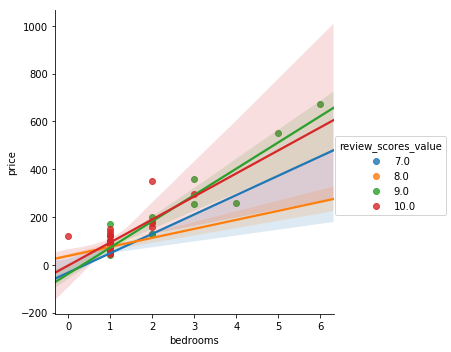

In [23]:
#relationship between number of bedrooms and Price of Houses
sns.lmplot(data=filtered_data_3, x='bedrooms', y='price', hue='review_scores_value')


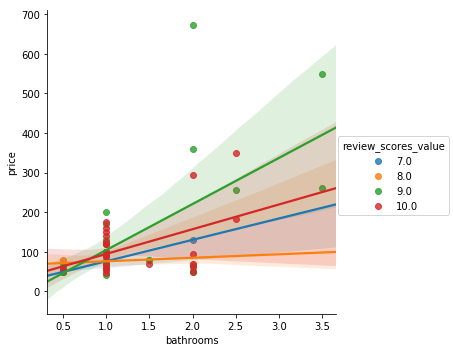

In [24]:
#relationship between number of bathrooms and Price of Houses

sns.lmplot(data=filtered_data_3, x='bathrooms', y='price', hue='review_scores_value')


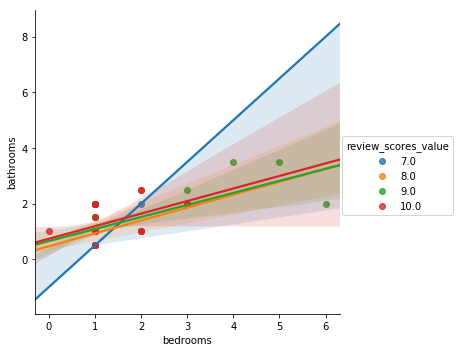

In [25]:
#relationship between number of bedrooms and number of bathrroms
sns.lmplot(data=filtered_data_3, x='bedrooms', y='bathrooms', hue='review_scores_value')



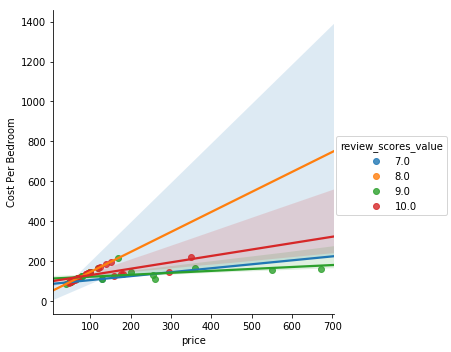

In [26]:
#relationship between number of Price and cost per bedroom
sns.lmplot(data=filtered_data_3, x='price', y='Cost Per Bedroom', hue='review_scores_value')


In [27]:
filtered_data_3.info()
filtered_data_3.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 2558 to 3598
Data columns (total 9 columns):
property_type          63 non-null object
neighbourhood          63 non-null object
review_scores_value    63 non-null float64
bathrooms              63 non-null float64
bedrooms               63 non-null float64
price                  63 non-null float64
longitude              63 non-null float64
latitude               63 non-null float64
Cost Per Bedroom       62 non-null float64
dtypes: float64(7), object(2)
memory usage: 4.9+ KB


,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude,Cost Per Bedroom
count,63,63,63.00,63.00,63.00,63.00,63.00,63.00,62.00
unique,1,1,nan,nan,nan,nan,nan,nan,nan
top,House,Capitol Hill,nan,nan,nan,nan,nan,nan,nan
freq,63,63,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,9.27,1.28,1.38,122.05,-122.32,47.62,129.94
std,NaN,NaN,0.79,0.69,0.99,114.24,0.00,0.00,29.84
min,NaN,NaN,7.00,0.50,0.00,40.00,-122.33,47.62,87.62
25%,NaN,NaN,9.00,1.00,1.00,59.50,-122.32,47.62,106.37
50%,NaN,NaN,9.00,1.00,1.00,89.00,-122.32,47.62,126.62
75%,NaN,NaN,10.00,2.00,1.00,127.00,-122.32,47.63,147.62


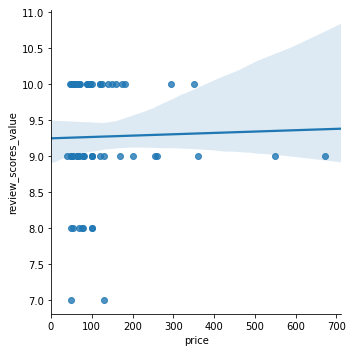

In [28]:
#relationship between number of Price and cost per bedroom
sns.lmplot(data=filtered_data_3, x='price', y='review_scores_value')
